# Problem 1 (15%)
Consider provided Jupyter notebook Summaries and NameScopes.ipynb. Add one more output summary. For example, calculate the rolling mean of all one dimensional tensors passed as arguments of run_graph function. Provide working notebook and images of your graphs and calculated summaries. In the Word document presented as your solution provide snippets of additional or modified code.

### Moving average
I calculated the **Cumulative Moving Average**, i.e, the average of all vectors up to the current data. I also updated the output summary so that it includes the results from the Cumulative Moving Average. 

In [9]:
# Import library
import tensorflow as tf
import numpy as np
from IPython.display import Image

In [2]:
# Helper function
def run_graph(input_tensor):
    """
    Helper function; runs the graph with given input
    tensor and saves summaries
    """
    feed_dict = {a: input_tensor}
    out, step, summary = sess.run([output,
                                   increment_step, merged_summaries],
                                  feed_dict=feed_dict)
    writer.add_summary(summary, global_step=step)

In [3]:
# Explicitly create a Graph object
graph = tf.Graph()

with graph.as_default():
    
    with tf.name_scope("variables"):
        global_step = tf.Variable(0, dtype=tf.int32, name="global_step")
        total_length = tf.Variable(0, dtype=tf.int32, name="total_length")
        total_sum = tf.Variable(0.0, dtype=tf.float32, name="total_sum")
        total_output = tf.Variable(0.0, dtype=tf.float32, name="total_output")

    # Primary transformation Operations
    with tf.name_scope("transformation"):
        
        # Separate input layer
        with tf.name_scope("input"):
            # Create input placeholder- takes in a Vector 
            a = tf.placeholder(tf.float32, shape=[None], name="input_placeholder_a")
    
        # Separate middle layer
        with tf.name_scope("intermediate_layer"):
            b = tf.reduce_prod(a, name="product_b")
            c = tf.reduce_sum(a, name="sum_c")
            d = tf.size(a, name="length_d")
            
    # Summary Operations
    with tf.name_scope("summaries"):
        increment_step = global_step.assign_add(1)
        update_length = total_length.assign_add(d)
        update_sum = total_sum.assign_add(c)
        roll_mean = tf.div(update_sum,
                           tf.cast(update_length, tf.float32),
                           name="Rolling_mean")
        output = tf.add(b, c, name="output")
        output = tf.add(output, roll_mean, name="output")
        update_total = total_output.assign_add(output)
        avg = tf.div(update_total, tf.cast(increment_step,
                                           tf.float32),
                     name="average")
            
        # Creates summaries for output node
        tf.summary.scalar('1_Product', b)
        tf.summary.scalar('2_Sum', c)
        tf.summary.scalar('3_Rolling_mean', roll_mean) 
        tf.summary.scalar('4_Output', output)
        tf.summary.scalar('5_Sum_of_outputs_over_time',
                          update_total) 
        tf.summary.scalar('6_Average_of_outputs_over_time',
                          avg) 

    # Global Variables and Operations
    with tf.name_scope("global_ops"):
        # Initialization Op
        init = tf.global_variables_initializer()    
        # Merge all summaries into one Operation
        merged_summaries = tf.summary.merge_all()
        
# Start a Session, using the explicitly created Graph
sess = tf.Session(graph=graph)

# Open a SummaryWriter to save summaries
writer = tf.summary.FileWriter('summaries', graph)

# Initialize Variables
sess.run(init)

In [4]:
# Run the graph with various inputs
run_graph([2,8])
run_graph([3,1,3,3])
run_graph([8])
run_graph([1,2,3])
run_graph([11,4])
run_graph([4,1])
run_graph([7,3,1])
run_graph([6,3])
run_graph([0,2])
run_graph([4,5,6])

In [5]:
# Write the summaries to disk
writer.flush()

# Close the tf.summary.FileWriter
writer.close()

# Close the session
sess.close()

### Plot I: Calculated summaries
In order to analyis the tensorboard graphics the following bash command can be run.

```bash
tensorboard --logdir 'summaries'
```

The following tensorgraphs show the 10 runs we're having with the vectors: [2,8], [3,1,3,3], [8], [1,2,3], [11,4], [4,1], [7,3,1], [6,3], [0,2], [4,5,6].

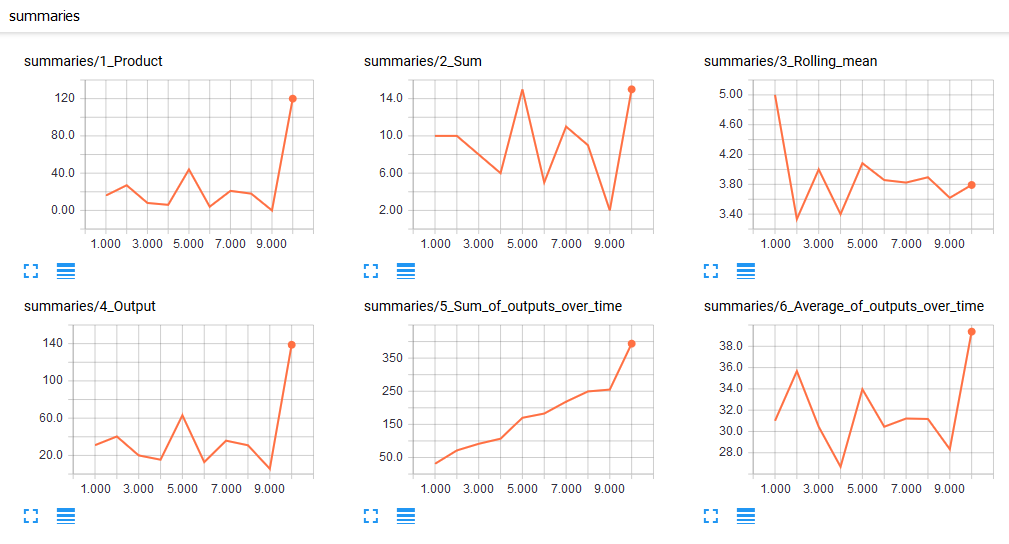

In [6]:
fig = Image(filename=('/home/tim/hw11/img/p1_1.png'))
fig

#### Individual values (upper half)
The first picture shows the product of all the values inside the vector (e.g., vector nr. 1 has a value of 16). The second picture is the sum of the values inside the vector (e.g., vector nr. 1 has a value of 10). The third picture shows the rolling cumulative mean value. vector 1 has a mean value of 5, that means the cumulative rolling mean is also 5. Moving on to vector 2, the mean value is 2.5, however, the rolling mean is 3.33. This is because we're now having the combination of vector 1 and 2 to to consider, i.e., [2, 8, 3, 1, 3, 3]. The mean value of that is 3.33.

#### Aggregated values (lower part)
The lower part of the above pictures is showing the aggregated summary values. The fourth picture describes the overall sum of all values calculated inside the functions 1-3 (i.e., product + sum + rolling_mean). The fifth  picture shows the overall sum over time (agg_ouput1 + agg_ouput1 etc.). The sixth pictures shows the mean of the outputs over the time.

### Plot II: Tensorgraph
The following picture shows the network graph of the analyis above.

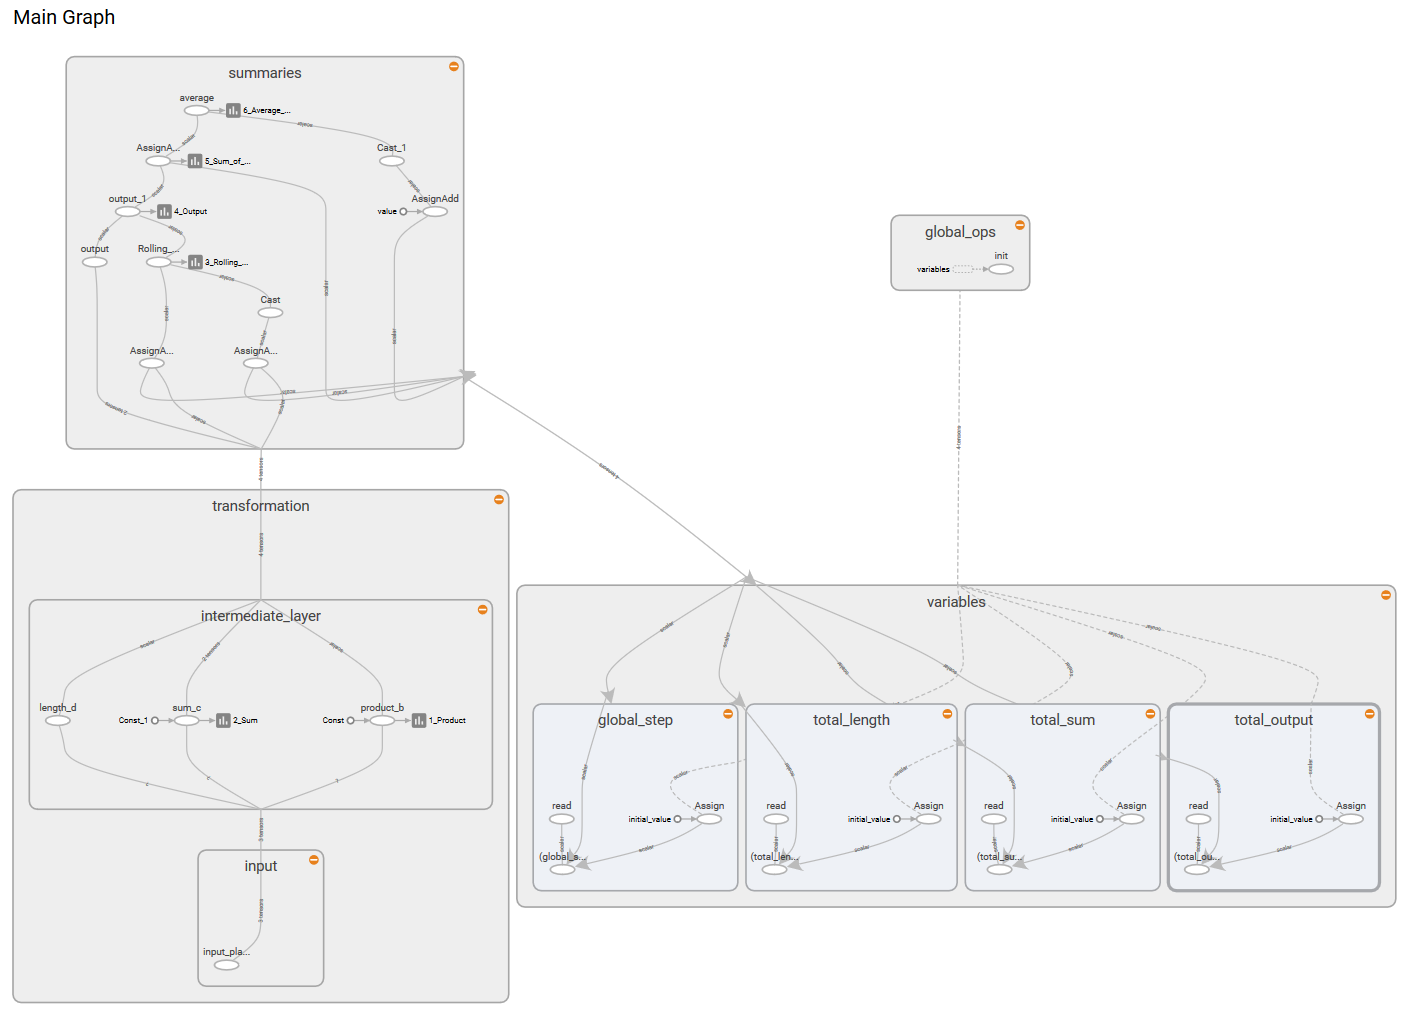

In [7]:
fig = Image(filename=('/home/tim/hw11/img/p1_2.png'))
fig

# Problem 2 (25%)
**Question:** Consider the attached file logistic_regression_mnist.py. Search through TensorFlow API documentation and the Internet and describe for us what is the meaning and purpose of functions used in step 5 and step 6.

#### Meaning step 5
The *tf.nn.softmax_cross_entropy_with_logits* function in step 5 calculates the cross entropy of the result after using a softmax function. The loss function is defined as the mean of entropy.

#### Meaning step 6
In step 6 *gradient decent* is used in order to minimize the loss. In this step the model is trained on a certain batch size. Furthermore the average loss per batch is recorded with the total run time and the accuracy of the model using some test data.

**Question:** Demonstrate that you can run the code successfully.

We can run the *logistic_regression_mnist-1.py* code with the following bash command:
```bash
python /home/tim/hw11/code/logistic_regression_mnist-1.py
```

Having those parameters:

* learning_rate = 0.01
* batch_size = 128
* n_epochs = 30

leads to the following output.
```bash
2017-11-13 14:27:24.729610: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
Average loss epoch 0: 1.28509407972
Average loss epoch 1: 0.732446798217
Average loss epoch 2: 0.599800021498
Average loss epoch 3: 0.537463494809
Average loss epoch 4: 0.497836460878
Average loss epoch 5: 0.471589082743
Average loss epoch 6: 0.451638019168
Average loss epoch 7: 0.435541740108
Average loss epoch 8: 0.423157613038
Average loss epoch 9: 0.412838064395
Average loss epoch 10: 0.405262912278
Average loss epoch 11: 0.397252654314
Average loss epoch 12: 0.390558742768
Average loss epoch 13: 0.383705951986
Average loss epoch 14: 0.378570248614
Average loss epoch 15: 0.374783192273
Average loss epoch 16: 0.371308067705
Average loss epoch 17: 0.366376711182
Average loss epoch 18: 0.362410888354
Average loss epoch 19: 0.358795878944
Average loss epoch 20: 0.358775554559
Average loss epoch 21: 0.35313237488
Average loss epoch 22: 0.350272573479
Average loss epoch 23: 0.348385391223
Average loss epoch 24: 0.347936009541
Average loss epoch 25: 0.343370734534
Average loss epoch 26: 0.343159333879
Average loss epoch 27: 0.339506200005
Average loss epoch 28: 0.33858445846
Average loss epoch 29: 0.33675496367
Total time: 19.3846440315 seconds
Optimization Finished!
Accuracy 0.9116
```

**Question:** Fetch for us the TensorBoard Graph.

In order to fetch the tensorboard graph we're running the following command:

```bash
tensorboard --logdir 'logistic_reg'
```


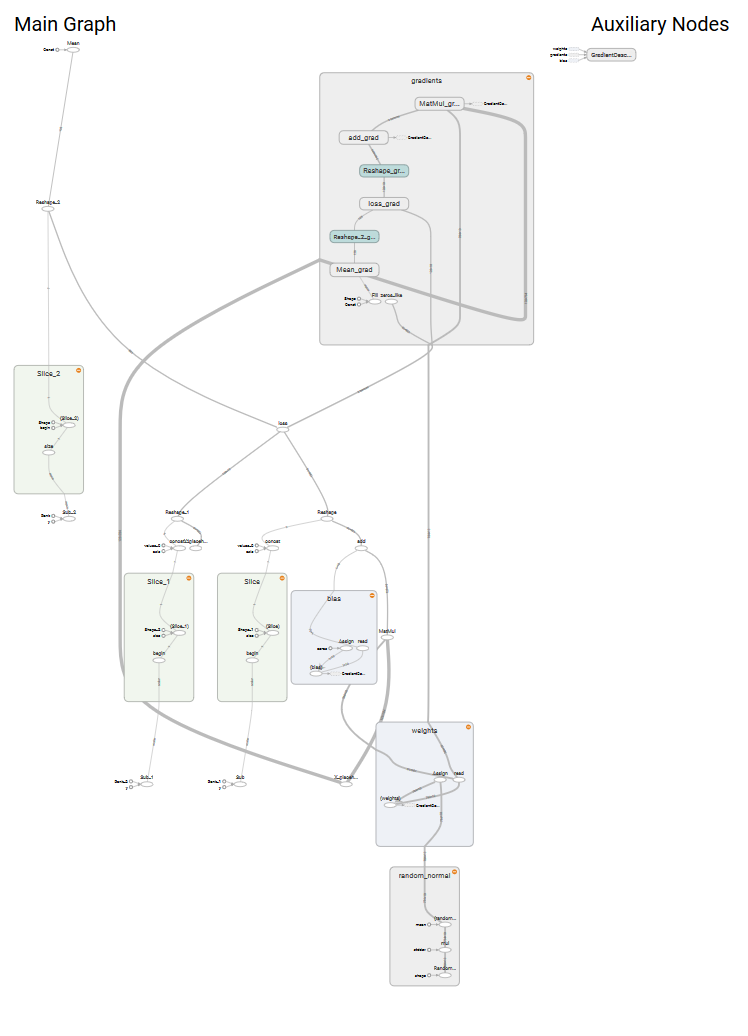

In [8]:
fig = Image(filename=('/home/tim/hw11/img/p2_1.png'))
fig

**Question:** Vary parameter batch_size through values: 8, 64, 128, 256 and report and plot changes in the execution time and accuracy. Keep other parameters the same as in the original program.

In [9]:
# Load libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import time

In [14]:
# Adapt training to allow for different variables
def run_training(learning_rate, batch_size, n_epochs, mnist):
        
    # Step 2: create placeholders for features and labels
    # each image in the MNIST data is of shape 28*28 = 784
    # therefore, each image is represented with a 1x784 tensor
    # there are 10 classes for each image, corresponding to digits 0 - 9. 
    # each lable is one hot vector.
    X = tf.placeholder(tf.float32, [batch_size, 784],
                       name='X_placeholder') 
    Y = tf.placeholder(tf.float32, [batch_size, 10],
                       name='Y_placeholder')
    
    # Step 3: create weights and bias
    # w is initialized to random variables with mean of 0, stddev of 0.01
    # b is initialized to 0
    # shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
    # shape of b depends on Y
    w = tf.Variable(tf.random_normal(shape=[784, 10],
                                     stddev=0.01),
                    name='weights')
    b = tf.Variable(tf.zeros([1, 10]), name="bias")
    
    # Step 4: build model
    # the model that returns the logits.
    # this logits will be later passed through softmax layer
    logits = tf.matmul(X, w) + b 
    
    # Step 5: define loss function
    # use cross entropy of softmax of logits as the loss function
    entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                      labels=Y,
                                                      name='loss')
    loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch
    
    # Step 6: define training op
    # using gradient descent with learning rate of 0.01 to minimize loss
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    with tf.Session() as sess:
        # to visualize using TensorBoard
        writer = tf.summary.FileWriter('./logistic_reg', sess.graph)
    
        start_time = time.time()
        sess.run(tf.global_variables_initializer())    
        n_batches = int(mnist.train.num_examples/batch_size)
        for i in range(n_epochs): # train the model n_epochs times
            total_loss = 0
    
            for _ in range(n_batches):
                X_batch, Y_batch = mnist.train.next_batch(batch_size)
                _, loss_batch = sess.run([optimizer, loss],
                                         feed_dict={X: X_batch,
                                                    Y:Y_batch}) 
                total_loss += loss_batch
            print ('Average loss epoch {0}: {1}'.format(i,
                                                        total_loss/n_batches))
        
        vec_run = time.time() - start_time
        print ('Total time: {0} seconds'.format(time.time() - start_time))
    
        print('Optimization Finished!') # should be around 0.35 after 25 epochs
    
        # test the model
        n_batches = int(mnist.test.num_examples/batch_size)
        total_correct_preds = 0
        for i in range(n_batches):
            X_batch, Y_batch = mnist.test.next_batch(batch_size)
            _, loss_batch, logits_batch = sess.run([optimizer,
                                                    loss,
                                                    logits],
                                                   feed_dict={X: X_batch,
                                                              Y:Y_batch}) 
            preds = tf.nn.softmax(logits_batch)
            correct_preds = tf.equal(tf.argmax(preds, 1),
                                     tf.argmax(Y_batch, 1))
            accuracy = tf.reduce_sum(tf.cast(correct_preds,
                                             tf.float32))
            total_correct_preds += sess.run(accuracy)    
    
        print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
    
        writer.close()
        
        # Return values
        return total_correct_preds/mnist.test.num_examples, vec_run

In [15]:
# Step 1: Read in data
mnist = input_data.read_data_sets('./mnist', one_hot=True)

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


In [42]:
# Define paramaters for the model
learning_rate = 0.001
batch_size = [8, 64, 128, 256]
n_epochs = 30

In [17]:
# Define empy arrays
vec_acc = []
vec_runs = []

# Loop trough values
for i in batch_size:
    acc, vec_run = run_training(learning_rate, i, n_epochs, mnist)
    vec_acc.append(acc)
    vec_runs.append(vec_run)

Average loss epoch 0: 1.09676138838
Average loss epoch 1: 0.614288856766
Average loss epoch 2: 0.516801182048
Average loss epoch 3: 0.469650677718
Average loss epoch 4: 0.440764405748
Average loss epoch 5: 0.420611310328
Average loss epoch 6: 0.40558351741
Average loss epoch 7: 0.393796648296
Average loss epoch 8: 0.384208967304
Average loss epoch 9: 0.376204153745
Average loss epoch 10: 0.369353588551
Average loss epoch 11: 0.363471476177
Average loss epoch 12: 0.358350430614
Average loss epoch 13: 0.353687567538
Average loss epoch 14: 0.349646614379
Average loss epoch 15: 0.345930733108
Average loss epoch 16: 0.342607832102
Average loss epoch 17: 0.33952622786
Average loss epoch 18: 0.336658048355
Average loss epoch 19: 0.334098044438
Average loss epoch 20: 0.331682102118
Average loss epoch 21: 0.329411141275
Average loss epoch 22: 0.327338199121
Average loss epoch 23: 0.325352245651
Average loss epoch 24: 0.323546136927
Average loss epoch 25: 0.321755269679
Average loss epoch 26: 0.

In [32]:
print("Batch size:", batch_size)
print("Accuracies:", vec_acc)
print("Execution time:", vec_runs)

('Batch size:', [8, 64, 128, 256])
('Accuracies:', [0.91739999999999999, 0.88890000000000002, 0.87519999999999998, 0.85880000000000001])
('Execution time:', [90.57566213607788, 22.935534954071045, 19.054670095443726, 15.596335887908936])


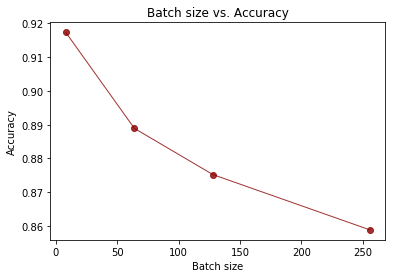

In [43]:
plt.plot(batch_size, vec_acc, linestyle='-', marker='o',
         color='darkred', linewidth=1, alpha=0.8)
plt.title("Batch size vs. Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Batch size')
plt.show()

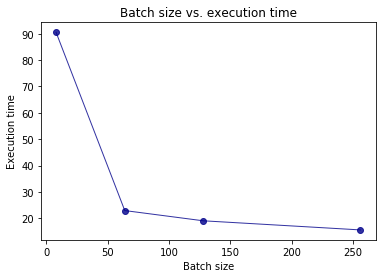

In [44]:
plt.plot(batch_size, vec_runs, linestyle='-', marker='o',
         color='darkblue', linewidth=1, alpha=0.8)
plt.title("Batch size vs. execution time")
plt.ylabel('Execution time')
plt.xlabel('Batch size')
plt.show()

**Question:** Similarly, vary parameter learning_rate through values 0.001, 0.005, 0.01, 0.02 and 0.05. Report and plot changes in the execution time and accuracy.

In [47]:
# Define paramaters for the model
learning_rate = [0.001, 0.005, 0.01, 0.02, 0.05]
batch_size = 128
n_epochs = 30

In [49]:
# Define empy arrays
vec_acc = []
vec_runs = []

# Loop trough values
for i in learning_rate:
    acc, vec_run = run_training(i, batch_size, n_epochs, mnist)
    vec_acc.append(acc)
    vec_runs.append(vec_run)

Average loss epoch 0: 2.11109958606
Average loss epoch 1: 1.77337754301
Average loss epoch 2: 1.53053915195
Average loss epoch 3: 1.35199989556
Average loss epoch 4: 1.22085755911
Average loss epoch 5: 1.11478903535
Average loss epoch 6: 1.0406617443
Average loss epoch 7: 0.969922105332
Average loss epoch 8: 0.923886402781
Average loss epoch 9: 0.876568094556
Average loss epoch 10: 0.838552493454
Average loss epoch 11: 0.808753189646
Average loss epoch 12: 0.781183851766
Average loss epoch 13: 0.75540338474
Average loss epoch 14: 0.731005144008
Average loss epoch 15: 0.716514971151
Average loss epoch 16: 0.696597043451
Average loss epoch 17: 0.68123596337
Average loss epoch 18: 0.668232021771
Average loss epoch 19: 0.65361144187
Average loss epoch 20: 0.640719851831
Average loss epoch 21: 0.629777183066
Average loss epoch 22: 0.621821101243
Average loss epoch 23: 0.610210510956
Average loss epoch 24: 0.604856459828
Average loss epoch 25: 0.593234784467
Average loss epoch 26: 0.58518276

In [50]:
print("Learning rate:", learning_rate)
print("Accuracies:", vec_acc)
print("Execution time:", vec_runs)

('Learning rate:', [0.001, 0.005, 0.01, 0.02, 0.05])
('Accuracies:', [0.87590000000000001, 0.90310000000000001, 0.91190000000000004, 0.9173, 0.91949999999999998])
('Execution time:', [19.346468925476074, 19.716542959213257, 19.383656978607178, 19.396228790283203, 19.540778875350952])


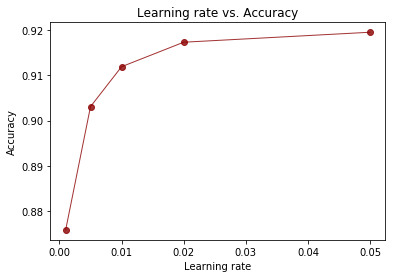

In [51]:
plt.plot(learning_rate, vec_acc, linestyle='-', marker='o',
         color='darkred', linewidth=1, alpha=0.8)
plt.title("Learning rate vs. Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.show()

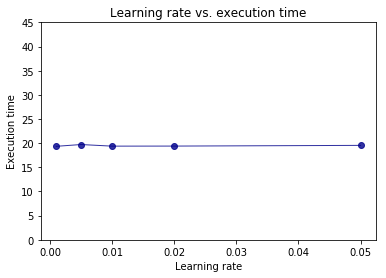

In [55]:
plt.plot(learning_rate, vec_runs, linestyle='-', marker='o',
         color='darkblue', linewidth=1, alpha=0.8)
plt.title("Learning rate vs. execution time")
plt.ylabel('Execution time')
plt.xlabel('Learning rate')
plt.ylim([0, 45])

plt.show()

# Problem 3 (35%)
Fetch Iris Dataset from https://archive.ics.uci.edu/ml/datasets/Iris and make attached Python script, softmax_irises.py work. You might have to upgrade the script to TF 1.x API. Generate TensorBoard graph of the process and use scalar summary to presenting variation of the loss function during the training process. Report the results of the evaluation process. 


#### Get the data
In order to get the data we can use wget and download the iris data from the ics link above with the following command: 
```bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
```

#### Upgrade code
Next I'm upgrading the *softmax_irises.py* code in the following lines: 

#### Load libraries

In [1]:
# Softmax example in TF using the classical Iris dataset
# Download iris.data from https://archive.ics.uci.edu/ml/datasets/Iris
import tensorflow as tf
import os

#### Set Variables

In [2]:
# this time weights form a matrix, not a column vector,
# one "weight vector" per class.
W = tf.Variable(tf.zeros([4, 3]), name="weights")

# so do the biases, one per class.
b = tf.Variable(tf.zeros([3], name="bias"))

#### Functions

In [3]:
def combine_inputs(X):
    return tf.matmul(X, W) + b

def inference(X):
    return tf.nn.softmax(combine_inputs(X))

def loss(X, Y):
    loss=tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=combine_inputs(X),
                                                                       labels=Y))
    tf.summary.scalar('loss', loss)
    return loss

def read_csv(batch_size, file_name, record_defaults):
    filename_queue = tf.train.string_input_producer(["/home/tim/hw11/data/" + "/" + file_name])
    reader = tf.TextLineReader(skip_header_lines=1)
    key, value = reader.read(filename_queue)

    # decode_csv will convert a Tensor from type string (the text line) in
    # a tuple of tensor columns with the specified defaults, which also
    # sets the data type for each column
    decoded = tf.decode_csv(value, record_defaults=record_defaults)

    # batch actually reads the file and loads "batch_size" rows in a single tensor
    return tf.train.shuffle_batch(decoded,
                                  batch_size=batch_size,
                                  capacity=batch_size * 50,
                                  min_after_dequeue=batch_size)

def inputs():
    sepal_length, sepal_width, petal_length, petal_width, label =\
        read_csv(100, "iris.data", [[0.0], [0.0], [0.0], [0.0], [""]])

    # convert class names to a 0 based class index.
    label_number = tf.to_int32(tf.argmax(tf.to_int32(tf.stack([
        tf.equal(label, ["Iris-setosa"]),
        tf.equal(label, ["Iris-versicolor"]),
        tf.equal(label, ["Iris-virginica"])
    ])), 0))

    # Pack all the features that we care about in a single matrix;
    # We then transpose to have a matrix with one example per row and one feature per column.
    features = tf.transpose(tf.stack([sepal_length, sepal_width,
                                      petal_length, petal_width]))

    return features, label_number

def train(total_loss):
    learning_rate = 0.01
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

def evaluate(sess, X, Y):
    predicted = tf.cast(tf.argmax(inference(X), 1), tf.int32)
    print sess.run(tf.reduce_mean(tf.cast(tf.equal(predicted, Y), tf.float32)))

#### Train model

In [4]:
# Launch the graph in a session, setup boilerplate
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    X, Y = inputs()
    total_loss = loss(X, Y)
    train_op = train(total_loss)

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    # actual training loop
    training_steps = 1000
    for step in range(training_steps):
        sess.run([train_op])
        # for debugging and learning purposes, see how the loss gets decremented thru training steps
        if step % 10 == 0:
            
            print "loss: ", sess.run([total_loss])
    
    writer = tf.summary.FileWriter('/home/tim/hw11/p3_iris', sess.graph)
    evaluate(sess, X, Y)
    writer.flush()
    writer.close()
    coord.request_stop()
    coord.join(threads)
    sess.close()

loss:  [1.0933079]
loss:  [1.0129499]
loss:  [0.96216154]
loss:  [0.90950936]
loss:  [0.86003435]
loss:  [0.84646928]
loss:  [0.81177109]
loss:  [0.76787591]
loss:  [0.78017074]
loss:  [0.68854356]
loss:  [0.72085834]
loss:  [0.72047102]
loss:  [0.66443521]
loss:  [0.66118151]
loss:  [0.65529788]
loss:  [0.65343076]
loss:  [0.68200105]
loss:  [0.60359037]
loss:  [0.60067827]
loss:  [0.61667144]
loss:  [0.54109991]
loss:  [0.61589342]
loss:  [0.56667554]
loss:  [0.5322088]
loss:  [0.58395886]
loss:  [0.52062112]
loss:  [0.52611327]
loss:  [0.54074407]
loss:  [0.50503832]
loss:  [0.5667752]
loss:  [0.5416916]
loss:  [0.45924258]
loss:  [0.52459204]
loss:  [0.48514757]
loss:  [0.53373694]
loss:  [0.46871611]
loss:  [0.47602504]
loss:  [0.53625083]
loss:  [0.46304154]
loss:  [0.48620269]
loss:  [0.49945885]
loss:  [0.45058793]
loss:  [0.49342698]
loss:  [0.43937066]
loss:  [0.49195588]
loss:  [0.47834265]
loss:  [0.43595183]
loss:  [0.42401549]
loss:  [0.47928536]
loss:  [0.42596015]
loss:

Above we see the output from the adopted code. Next we can also have a look at the tensorgraph.

### Plot Tensorgraph

```bash
tensorboard --logdir 'p3_iris'
```

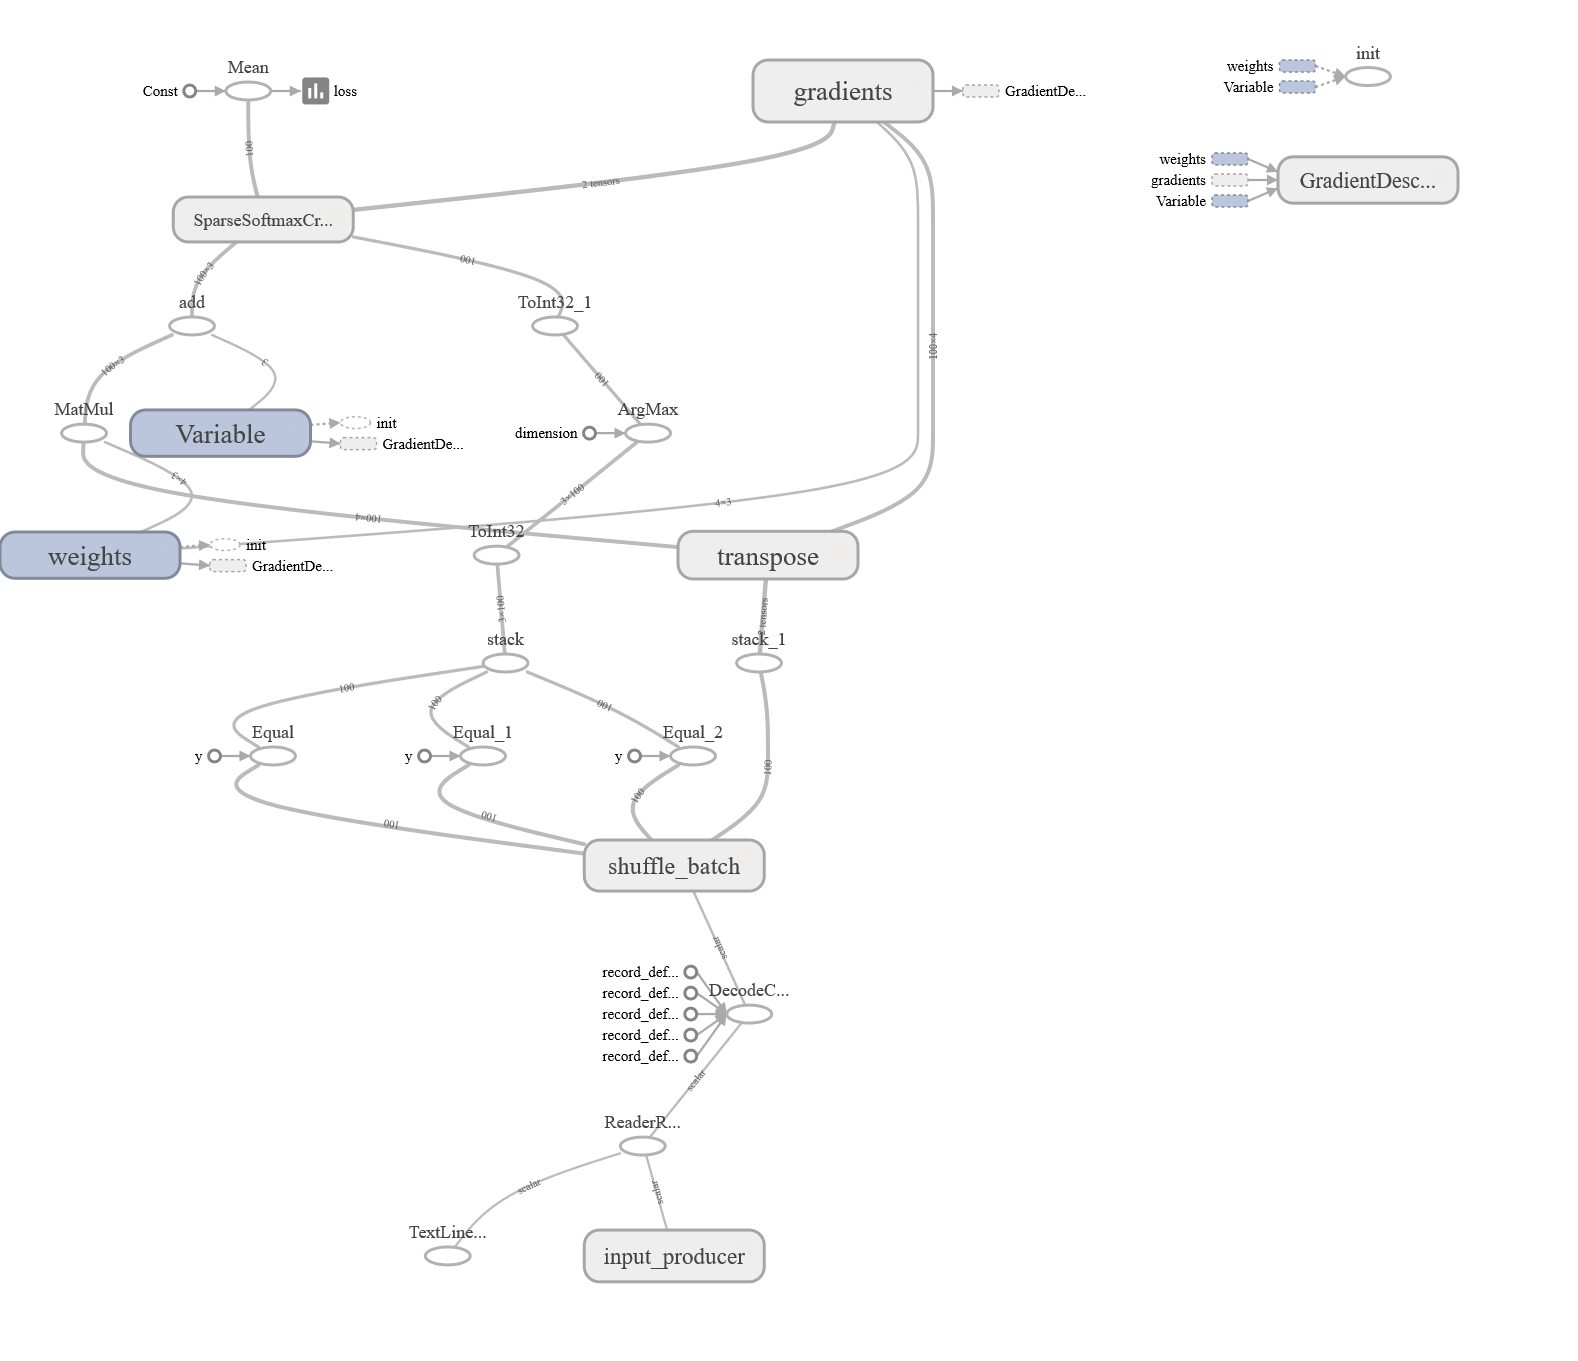

In [10]:
fig = Image(filename=('/home/tim/hw11/img/p3_1.png'))
fig

# Problem 4 (25%)
Analyze all relevant and non-obvious individual steps in the script, softwmax_irises.py by examining their inputs and outputs. When convenient, use existing Iris Dataset. When convenient, you are welcome to provide your own inputs. Please examine and describe actions of functions and operations within those functions. Please describe the effect of every function or command by providing an illustrative input and output set of values and well as a brief narrative.

### Iris data
Taking the *iris* dataset we can have a look at the transformations happening. After reading the data we have four 100 x 1 tensors (features) and an additional 100 x 1 tensor (label). The initial dependent variable tensor contains text descriptions for the 3 species iris-setosa, iris-versicolar and iris-virginica. Those are converted into a 0 1 2 tensor. This looks like this: 

#### X tensor (3 rows) 
```text
[5.4000001 3.70000005 1.5        0.2]
[4.5999999 3.20000005 1.39999998 0.2]
[5.4000001 3.         4.5        1.5]
```
#### labels
```text
['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa']
```

#### label tensors
```text
[0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 2 0 0 1 0 2 2 0 0 1 2 1 1 0 0 1 0 2 1 1
 1 2 2 1 2 2 0 0 0 2 0 1 0 1 0 2 0 2 2 1 0 2 1 0 2 2 2 0 2 2 0 0 0 1 0 0 0
 1 2 2 2 2 1 1 0 2 2 1 0 2 2 1 0 1 0 0 0 0 0 0 0 1 0]
```

### Functions
Next we can have a look at the individual functions.

```text
combine_inputs(), line 13
```
The *combine_inputs()* function brings together the inputs, weights and bias to calculate the Y(output) vector for the given input features. That means the functions takes X as an argument and returns X*W + b. Where W is the weights and b the bias as a constant. 

```text
inference(), line 17
```

This *inference* function calls up the softmax implementation of tensorflow. That means the function calculates the probability the input vector calculated by the above *combine_inputs()* function. 


```text
read_csv(), line 25
```
The above *read_csv* function reads in the csv document we want to load. In order to do that it takes 3 arguments (size of the batch, name of the file and the default records to be used when the text is a string. 

```text
decode_csv() line 34
```
The above *decode_csv* function takes the input file and transfroms the string type into a tensor with columns. When we use the function in our case of the iris set a tensor with 5 columns is resulting as an output. The 4 first columns are encoded as float32 and the label is encoded as a string.

```text
train.shuffle_batch(), line 37
```
The *train.shuffle_batch* function randomly shuffles the tensor and trought that creates batches. It returns a list of dictionary of tensors with the type as tensors.

```text
inputs(), line 43
```
The purpose of the *input* function is to prepare the 4 features and the 1 label.

```text
label_number = tf.to_int32(…), line 49
```
The *label_number* function converts the string class names to integer labels. This can also be seen when looking at the full line: 

```text
label_number = tf.to_int32(tf.argmax(tf.to_int32(tf.stack([tf.equal(label, ["Iris-setosa"]),tf.equal(label, ["Iris-versicolor"]),tf.equal(label, ["Iris-virginica"])])), 0))
```

We can see that the function identifies the potential classes (values of label) and ultimately converts them to values of Integer type (0-based). 

```text
features = tf.transpose(..), line 57
```
The above function take all 4 input features from the csv file and puts them into a single matrix. Next it transposes the matrix with one example per row and one feature per column. 

```text
evaluate(), line 67
```
The above function predicts values based on the model and then compares the predicted labels against the actual labels.

```text
predicted = tf.cast(tf.arg_max(inference(X), 1).., line 69
```
This line of Evaluate function calls inference with the input vector as input. The inference function inturn calculates the probability the input vector belongs to each class. The arg_max is used to predict the label based on the max of the output vector.

```text
tf.reduce_mean(tf.cast(tf.equal(predicted,Y),.,line 71
```
The above function calculates the mean of the difference between predicted and the actual class for each input vector. In other words we're measuring the accuracy of the model.

```text
threads = tf.train.start_queue_runners(sess=sess, coord=coord).., line 85
```
The above function start the queue runners collected in the graph, and it returns the list of all threads. These threads use a coordinator to stop together, i.e., the coordinator helps the multiple threads to stop together.
